In [14]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv('CaseCompetitionData.csv', sep=',')
data['actual'] = 1
data.loc[data['subsequent_purchases'] == 0, 'actual'] = 0
data['customer_age'] = data['customer_age'].map({'21 - 30':25, '61 - 70':65, '31 - 40':35, '41 - 50':45, '51 - 60':55, '101+':102, '71 - 80':75,
 '0 - 20':10, '81 - 90':85, '?':'?', '91 - 100':95})
data['customer_income'] = data['customer_income'].map({'20001 - 40000':30000, '80001 - 100000':90000, '40001 - 60000':50000, '60001 - 80000':70000,
 '120001 - 140000':130000, '0 - 20000':10000, '100001 - 120000':110000, '160001 - 180000':170000,
 '200001+':220000, '140001 - 160000':150000, '180001 - 200000':190000, '?':'?'})
data['purchase_price'] = data['purchase_price'].map({'10001 - 15000':12500, '15001 - 20000':17500, 
 '20001 - 25000':22500, '25001 - 30000':27500, '30001 - 35000':32500, '0 - 5000':2500, '45001 - 50000':47500, 
 '35001 - 40000':27500, '5001 - 10000':7500, '40001 - 45000':42500, '55001 - 60000':57500, '50001 - 55000':52500, 
 '60001 - 65000':62500, '65001 - 70000':67500, '70001 - 75000':72500, '75001 - 80000':77500, '85001 - 90000':87500,
 '90001 - 95000':92500, '80001 - 85000':82500, '?':'?'})
data['counter'] = 1
price = data.loc[data['purchase_price'] != '?']
income = data.loc[data['customer_income'] != '?']
distance = data.loc[data['customer_distance_to_dealer'] != '?']
age = data.loc[data['customer_age'] != '?']
print(len(price))
print(len(income))
print(len(distance))
print(len(age))
distance['customer_distance_to_dealer'] = distance['customer_distance_to_dealer'].astype(np.int64)
income['customer_income'] = income['customer_income'].astype(np.int64)

361556
312468
355397
360405


C:\Users\999Na\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\999Na\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



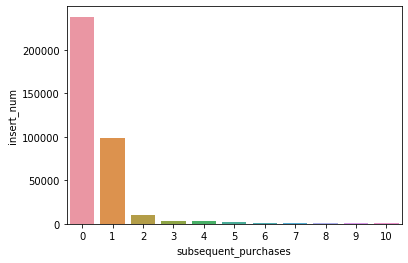

In [5]:
subs = data.groupby('subsequent_purchases')['insert_num'].count().to_frame().reset_index()
sns.barplot(x='subsequent_purchases', y='insert_num', data=subs)

In [32]:
### Quantifying subs ratio for binary features

trade_in = data.groupby('trade_in')['actual'].mean().to_frame().reset_index()
print(trade_in.head())
customer_previous_purchase = data.groupby('customer_previous_purchase')['actual'].mean().to_frame().reset_index()
print(customer_previous_purchase.head())
warranty_used = data.groupby('vehicle_warranty_used')['actual'].mean().to_frame().reset_index()
print(warranty_used.head())
financing = data.groupby('vehicle_financing')['actual'].mean().to_frame().reset_index()
print(financing.head())
#trade_in.to_csv('trade_subs.csv')
#customer_previous_purchase.to_csv('prev_subs.csv')
#warranty_used.to_csv('war_subs.csv')
#financing.to_csv('fin_subs.csv')





   trade_in    actual
0         0  0.322550
1         1  0.363858
   customer_previous_purchase    actual
0                           0  0.329577
1                           1  0.387068
   vehicle_warranty_used    actual
0                      0  0.335684
1                      1  0.359969
   vehicle_financing    actual
0                  0  0.370446
1                  1  0.333032


In [4]:
### Trade_in subs split distribution

par_cats = data[['actual', 'trade_in']]
par_cats.dtypes
fig = px.parallel_categories(par_cats)
py.offline.plot(fig, filename='parallel_cats.html', auto_open=True)

'parallel_cats.html'

In [ ]:
purch_subs = data.groupby()

In [41]:
### Trade_in purchase year subs ratio

purchase_year = data.loc[data['purchase_vehicle_year'] >= 2000].groupby(['trade_in', 'purchase_vehicle_year'])['actual'].mean().to_frame().reset_index()
purchase_year
fig = px.bar(purchase_year, x='purchase_vehicle_year', y='actual', facet_row='trade_in')
py.offline.plot(fig, 'year_previous.html', auto_open=True)

#purchase_year.to_csv('purchase_year.csv')

'temp-plot.html'

In [39]:
### Trade in purchase year subs split distribution

par_cats = price.loc[price['purchase_vehicle_year'] >= 2000][['actual', 'purchase_vehicle_year', 'trade_in']]
#par_cats.to_csv('trade_year_subs.csv')
#print(par_cats['purchase_vehicle_year'].unique())
#fig = px.parallel_categories(par_cats)
#py.offline.plot(fig, filename='parallel_cats.html', auto_open=True)

In [42]:
### Trade in income subs ratio

income_trade = income.groupby(['customer_income', 'trade_in'])['actual'].mean().to_frame().reset_index()
#purchase_year
#fig = px.bar(income_trade, x='customer_income', y='actual', facet_row='trade_in')
#py.offline.plot(fig, 'income_trade.html', auto_open=True)
#income_trade.to_csv('income_trade_subs.csv')

In [43]:
### Trade in purchase price subs ratio

price_trade = price.groupby(['purchase_price', 'trade_in'])['actual'].mean().to_frame().reset_index()
#purchase_year
#fig = px.bar(price_trade, x='purchase_price', y='actual', facet_row='trade_in')
#py.offline.plot(fig, 'price_trade.html', auto_open=True)
#data['actual'].mean()
#price_trade.to_csv('price_trade_subs.csv')

In [11]:
### trade in age subs ratio

age_trade = age.groupby(['customer_age', 'trade_in'])['actual'].mean().to_frame().reset_index()

fig = px.bar(age_trade, x='customer_age', y='actual', facet_row='trade_in')
py.offline.plot(fig, 'age_trade.html', auto_open=True)

'temp-plot.html'

In [13]:
### trade in distance to dealer subs ratio

dist_subs = distance.loc[distance['customer_distance_to_dealer'] <= 50].groupby(['customer_distance_to_dealer', 'customer_previous_purchase'])['actual'].mean().to_frame().reset_index()

fig = px.line(dist_subs, x='customer_distance_to_dealer', y='actual', facet_row='customer_previous_purchase')
py.offline.plot(fig, 'dist_trade.html', auto_open=True)
#dist_subs.to_csv('dist_prev_subs_50.csv')

In [17]:
### trade in make subs ratio

make_trade = data.groupby(['purchase_make', 'trade_in'])['actual'].mean().to_frame().reset_index()

#fig = px.bar(make_trade, x='purchase_make', y='actual', facet_row='trade_in')
#py.offline.plot(fig, 'make_trade.html', auto_open=True)

make_subs = data.groupby('purchase_make')['actual'].mean().to_frame().reset_index()
fig = px.bar(make_subs, x='purchase_make', y='actual')
py.offline.plot(fig, 'make_subs.html', auto_open=True)

'temp-plot.html'

In [16]:
make_prev = data.groupby(['purchase_make', 'customer_previous_purchase'])['actual'].mean().to_frame().reset_index()
fig = px.bar(make_prev, x='purchase_make', y='actual', facet_row='customer_previous_purchase')
py.offline.plot(fig, 'make_prev.html', auto_open=True)

'temp-plot.html'

0.35903806022061013
0.5550632128474738


PermissionError: [Errno 13] Permission denied: 'low_make_subs.csv'

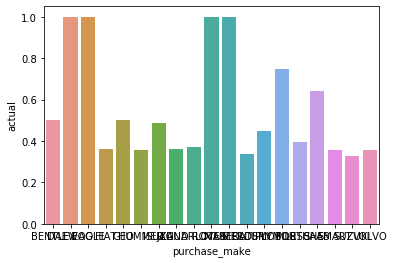

In [13]:
makes = data
makes['counter'] = 1
makes = makes.groupby('purchase_make')['counter'].sum().to_frame().reset_index()

low_demand = makes.loc[makes['counter'] < 2000]
print(data.loc[data.purchase_make.isin(low_demand['purchase_make'].unique())]['actual'].mean())
low_make = data.loc[data.purchase_make.isin(low_demand['purchase_make'].unique())].groupby('purchase_make')['actual'].mean().to_frame().reset_index()
sns.barplot(x='purchase_make', y='actual', data=low_make)
print(low_make['actual'].mean())
#low_make.to_csv('low_make_subs.csv')
#makes
#low_demand.to_csv('low_demand_dist.csv')
#make_subs.groupby('purchase_make')['actual'].mean().to_frame().reset_index().to_csv('make_subs.csv')

In [14]:
make_fin = data.groupby(['purchase_make', 'vehicle_financing'])['actual'].mean().to_frame().reset_index()
#fig = px.bar(make_fin, x='purchase_make', y='actual', facet_row='vehicle_financing')
#py.offline.plot(fig, 'make_fin.html', auto_open=True)
#make_fin.to_csv('make_fin_subs.csv')

In [38]:
### Purchase price subs ratio

purch_ratio = price.groupby('purchase_price')['actual'].mean().to_frame().reset_index()
#purch_ratio.to_csv('purch_subs.csv')
#fig = px.bar(purch_ratio, x='purchase_price', y='actual')
#py.offline.plot(fig, 'price_subs.html', auto_open=True)

In [13]:
### purchase price subs=1 distribution 

purch = price.loc[data['actual'] == 1].groupby('purchase_price')['actual'].sum().to_frame().reset_index()
fig = px.bar(purch, x='purchase_price', y='actual')
py.offline.plot(fig, 'price_subs_1_dist.html', auto_open=True)
purch

,purchase_price,actual
0,2500,2944
1,7500,3764
2,12500,33753
3,17500,39607
4,22500,22396
5,27500,13560
6,32500,5199
7,47500,1716
8,52500,249
9,57500,158


In [18]:
### purchase price distribution

purch_dist = price.groupby('purchase_price')['insert_num'].count().to_frame().reset_index()
fig = px.bar(purch_dist, x='purchase_price', y='insert_num')
py.offline.plot(fig, 'price_dist.html', auto_open=True)

'temp-plot.html'

In [19]:
### purchase price warranty subs ratio

warranty_price = price.groupby(['vehicle_warranty_used', 'purchase_price'])['actual'].mean().to_frame().reset_index()
fig = px.bar(warranty_price, x='purchase_price', y='actual', facet_row='vehicle_warranty_used')
py.offline.plot(fig, 'warranty_price.html', auto_open=True)

'temp-plot.html'

In [20]:
### purchase price year subs ratio

price_year = price.loc[price['purchase_vehicle_year'] > 2000].groupby(['purchase_vehicle_year', 'purchase_price'])['actual'].mean().to_frame().reset_index()
fig = px.bar(price_year, x='purchase_price', y='actual', facet_row='purchase_vehicle_year', width=1600, height=1600)
py.offline.plot(fig, 'price_year.html', auto_open=True)

'temp-plot.html'

In [21]:
### purchase price subs split distribution

par_cats = price[['actual', 'purchase_price']]
par_cats.dtypes
fig = px.parallel_categories(par_cats)
py.offline.plot(fig, filename='parallel_cats.html', auto_open=True)

'parallel_cats.html'

In [28]:
### purchase price income subs ratio

price_income = price.merge(income['insert_num'], on='insert_num')
price_income = price_income.groupby(['purchase_price', 'customer_income'])['actual'].mean().to_frame().reset_index()
fig = px.bar(price_income, x='purchase_price', y='actual', facet_row='customer_income', width=1600, height=1600)
py.offline.plot(fig, 'price_income.html', auto_open=True)

'temp-plot.html'

In [3]:
### purchase price income distribution

price_income = price.merge(income['insert_num'], on='insert_num')
price_income = price_income.groupby(['purchase_price', 'customer_income'])['actual'].mean().to_frame().reset_index()
fig = px.bar(price_income, x='purchase_price', y='actual', facet_row='customer_income', width=1600, height=1600)
py.offline.plot(fig, 'price_income.html', auto_open=True)

'temp-plot.html'

In [8]:
stuff = data.loc[data['vehicle_financing'] == 0].groupby('customer_income')['insert_num'].count().to_frame().reset_index()
stuff = stuff.sort_values(by=['customer_income'])

sns.barplot(x='customer_income', y='insert_num', data=stuff)


TypeError: '<' not supported between instances of 'str' and 'int'

In [5]:
fin_in = income.groupby('vehicle_financing')['insert_num'].count().to_frame().reset_index()
#fin_in.to_csv('fin_in.csv')
no_fin_in = income.loc[income['vehicle_financing'] == 0].groupby('customer_income')['insert_num'].count().to_frame().reset_index()
#no_fin_in.to_csv('no_fin_in.csv')
#sns.barplot(x='customer_income', y='insert_num', data=no_fin_in)

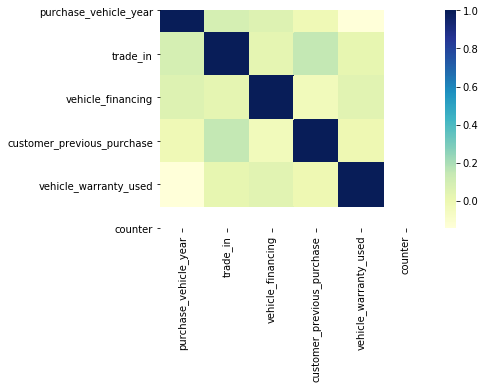

In [11]:
stuff = data.drop(columns=['subsequent_purchases', 'actual', 'insert_num'])
sns.heatmap(stuff.corr(), cmap="YlGnBu")

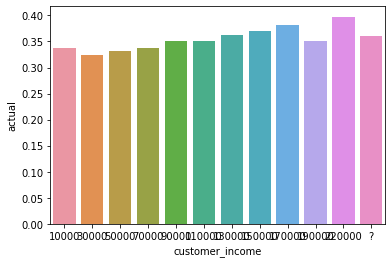

In [4]:
income_subs = data.groupby('customer_income')['actual'].mean().to_frame().reset_index()
sns.barplot(x='customer_income', y='actual', data=income_subs)

,insert_num,purchase_make,purchase_model,purchase_vehicle_year,purchase_price,trade_in,vehicle_financing,customer_age,customer_income,customer_gender,customer_previous_purchase,customer_distance_to_dealer,post_purchase_satisfaction,vehicle_warranty_used,subsequent_purchases,actual,counter
0,81690,DODGE,CHARGER,2010,12500,0,0,25,30000,U,0,9,?,1,0,0,1
1,109994,FORD,EXPLORER SPORT TRAC,2007,17500,0,1,65,30000,M,1,15,?,0,0,0,1
2,11399,BMW,328,2010,22500,1,1,35,90000,F,1,18,?,0,9,1,1
3,360305,VOLVO,S40,2008,17500,1,0,45,?,M,0,4,?,0,1,1,1
4,36685,CHEVROLET,CRUZE,2012,12500,1,1,25,50000,M,0,2,?,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361554,195314,JEEP,GRAND CHEROKEE,2005,17500,0,1,35,70000,M,0,5,?,0,0,0,1
361555,58219,CHEVROLET,SILVERADO 1500,2013,27500,0,1,25,110000,F,0,8,?,0,0,0,1
361556,207386,KIA,OPTIMA,2012,17500,1,1,45,50000,F,0,4,?,0,0,0,1
361557,252391,MINI,COOPER,2010,17500,1,1,45,50000,M,0,5,?,1,0,0,1


In [15]:
fin_trade = data.groupby(['vehicle_financing', 'trade_in'])['actual'].mean().to_frame().reset_index()
print(fin_trade)
war_trade = data.groupby(['vehicle_warranty_used', 'trade_in'])['actual'].mean().to_frame().reset_index()
print(war_trade)
data['customer_gender'] = data['customer_gender'].map({'M':0, 'F':1, 'U':2})
gen_trade = data.groupby(['customer_gender', 'trade_in'])['actual'].mean().to_frame().reset_index()
print(gen_trade)
data.loc[data['post_purchase_satisfaction'] != '?', 'survey'] = 1
data['survey'].fillna(value=0, inplace=True)
#surv_trade = data.groupby(['survey', 'trade_in'])['actual'].mean().to_frame().reset_index()
#print(surv_trade)
trade_prev = data.groupby(['customer_previous_purchase', 'trade_in'])['actual'].mean().to_frame().reset_index()
print(trade_prev)
prev_war = data.groupby(['customer_previous_purchase', 'vehicle_warranty_used'])['actual'].mean().to_frame().reset_index()
print(prev_war)
#war_fin = data.groupby(['vehicle_warranty_used', 'vehicle_financing'])['actual'].mean().to_frame().reset_index()
#print(war_fin)
#surv = data.groupby('survey')['actual'].mean().to_frame().reset_index()
#print(surv)


   vehicle_financing  trade_in    actual
0                  0         0  0.356170
1                  0         1  0.389012
2                  1         0  0.311624
3                  1         1  0.356862
   vehicle_warranty_used  trade_in    actual
0                      0         0  0.322565
1                      0         1  0.351245
2                      1         0  0.322503
3                      1         1  0.399762
Empty DataFrame
Columns: [customer_gender, trade_in, actual]
Index: []
   customer_previous_purchase  trade_in    actual
0                           0         0  0.316459
1                           0         1  0.347226
2                           1         0  0.355612
3                           1         1  0.407549
   customer_previous_purchase  vehicle_warranty_used    actual
0                           0                      0  0.323996
1                           0                      1  0.346280
2                           1                      0  0.3788

In [23]:
data.loc[data['customer_distance_to_dealer'] == '?']['actual'].mean()
len(data.loc[data['customer_distance_to_dealer'] == '?'])
# duely noted
data.loc[data['customer_distance_to_dealer'] == '?', 'dist_miss'] = 1
data['dist_miss'].fillna(value=0, inplace=True)
data.groupby('dist_miss').mean()


,insert_num,purchase_vehicle_year,trade_in,vehicle_financing,customer_gender,customer_previous_purchase,vehicle_warranty_used,subsequent_purchases,actual,counter,survey
dist_miss,,,,,,,,,,,
0.0,180881.349899,2009.392356,0.465488,0.769621,NaN,0.212574,0.249316,0.534113,0.330315,1.0,0.003368
1.0,174934.584550,2009.332360,0.394190,0.648491,NaN,0.141188,0.224765,1.000000,1.000000,1.0,0.003570


In [9]:
price['purchase_price'] = price['purchase_price'].astype(np.int64)

price.loc[(data['subsequent_purchases'] > 1)].groupby('subsequent_purchases').mean()
#data.loc[data['subsequent_purchases'] > 1]
#data.dtypes

C:\Users\999Na\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,insert_num,purchase_vehicle_year,purchase_price,trade_in,vehicle_financing,customer_previous_purchase,vehicle_warranty_used,actual,counter
subsequent_purchases,,,,,,,,,
2,177322.590273,2008.517128,17803.483547,0.516356,0.668725,0.328766,0.265174,1.0,1.0
3,179982.065906,2009.146341,18877.789310,0.490400,0.723923,0.266995,0.270109,1.0,1.0
4,180955.217775,2009.427671,18536.873621,0.453199,0.752915,0.207060,0.233218,1.0,1.0
5,180618.648503,2009.305351,18719.931271,0.439863,0.732941,0.217477,0.228768,1.0,1.0
6,180278.304104,2009.235075,18894.589552,0.483209,0.759328,0.240672,0.267724,1.0,1.0
7,177596.619485,2009.397059,18474.264706,0.463235,0.737132,0.222426,0.262868,1.0,1.0
8,182326.128155,2009.395146,18407.766990,0.428155,0.751456,0.217476,0.238835,1.0,1.0
9,176858.056725,2009.354986,18469.807868,0.445563,0.763038,0.207685,0.251601,1.0,1.0
10,182880.320448,2009.483215,19066.632757,0.466938,0.763988,0.236012,0.264496,1.0,1.0


C:\Users\999Na\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



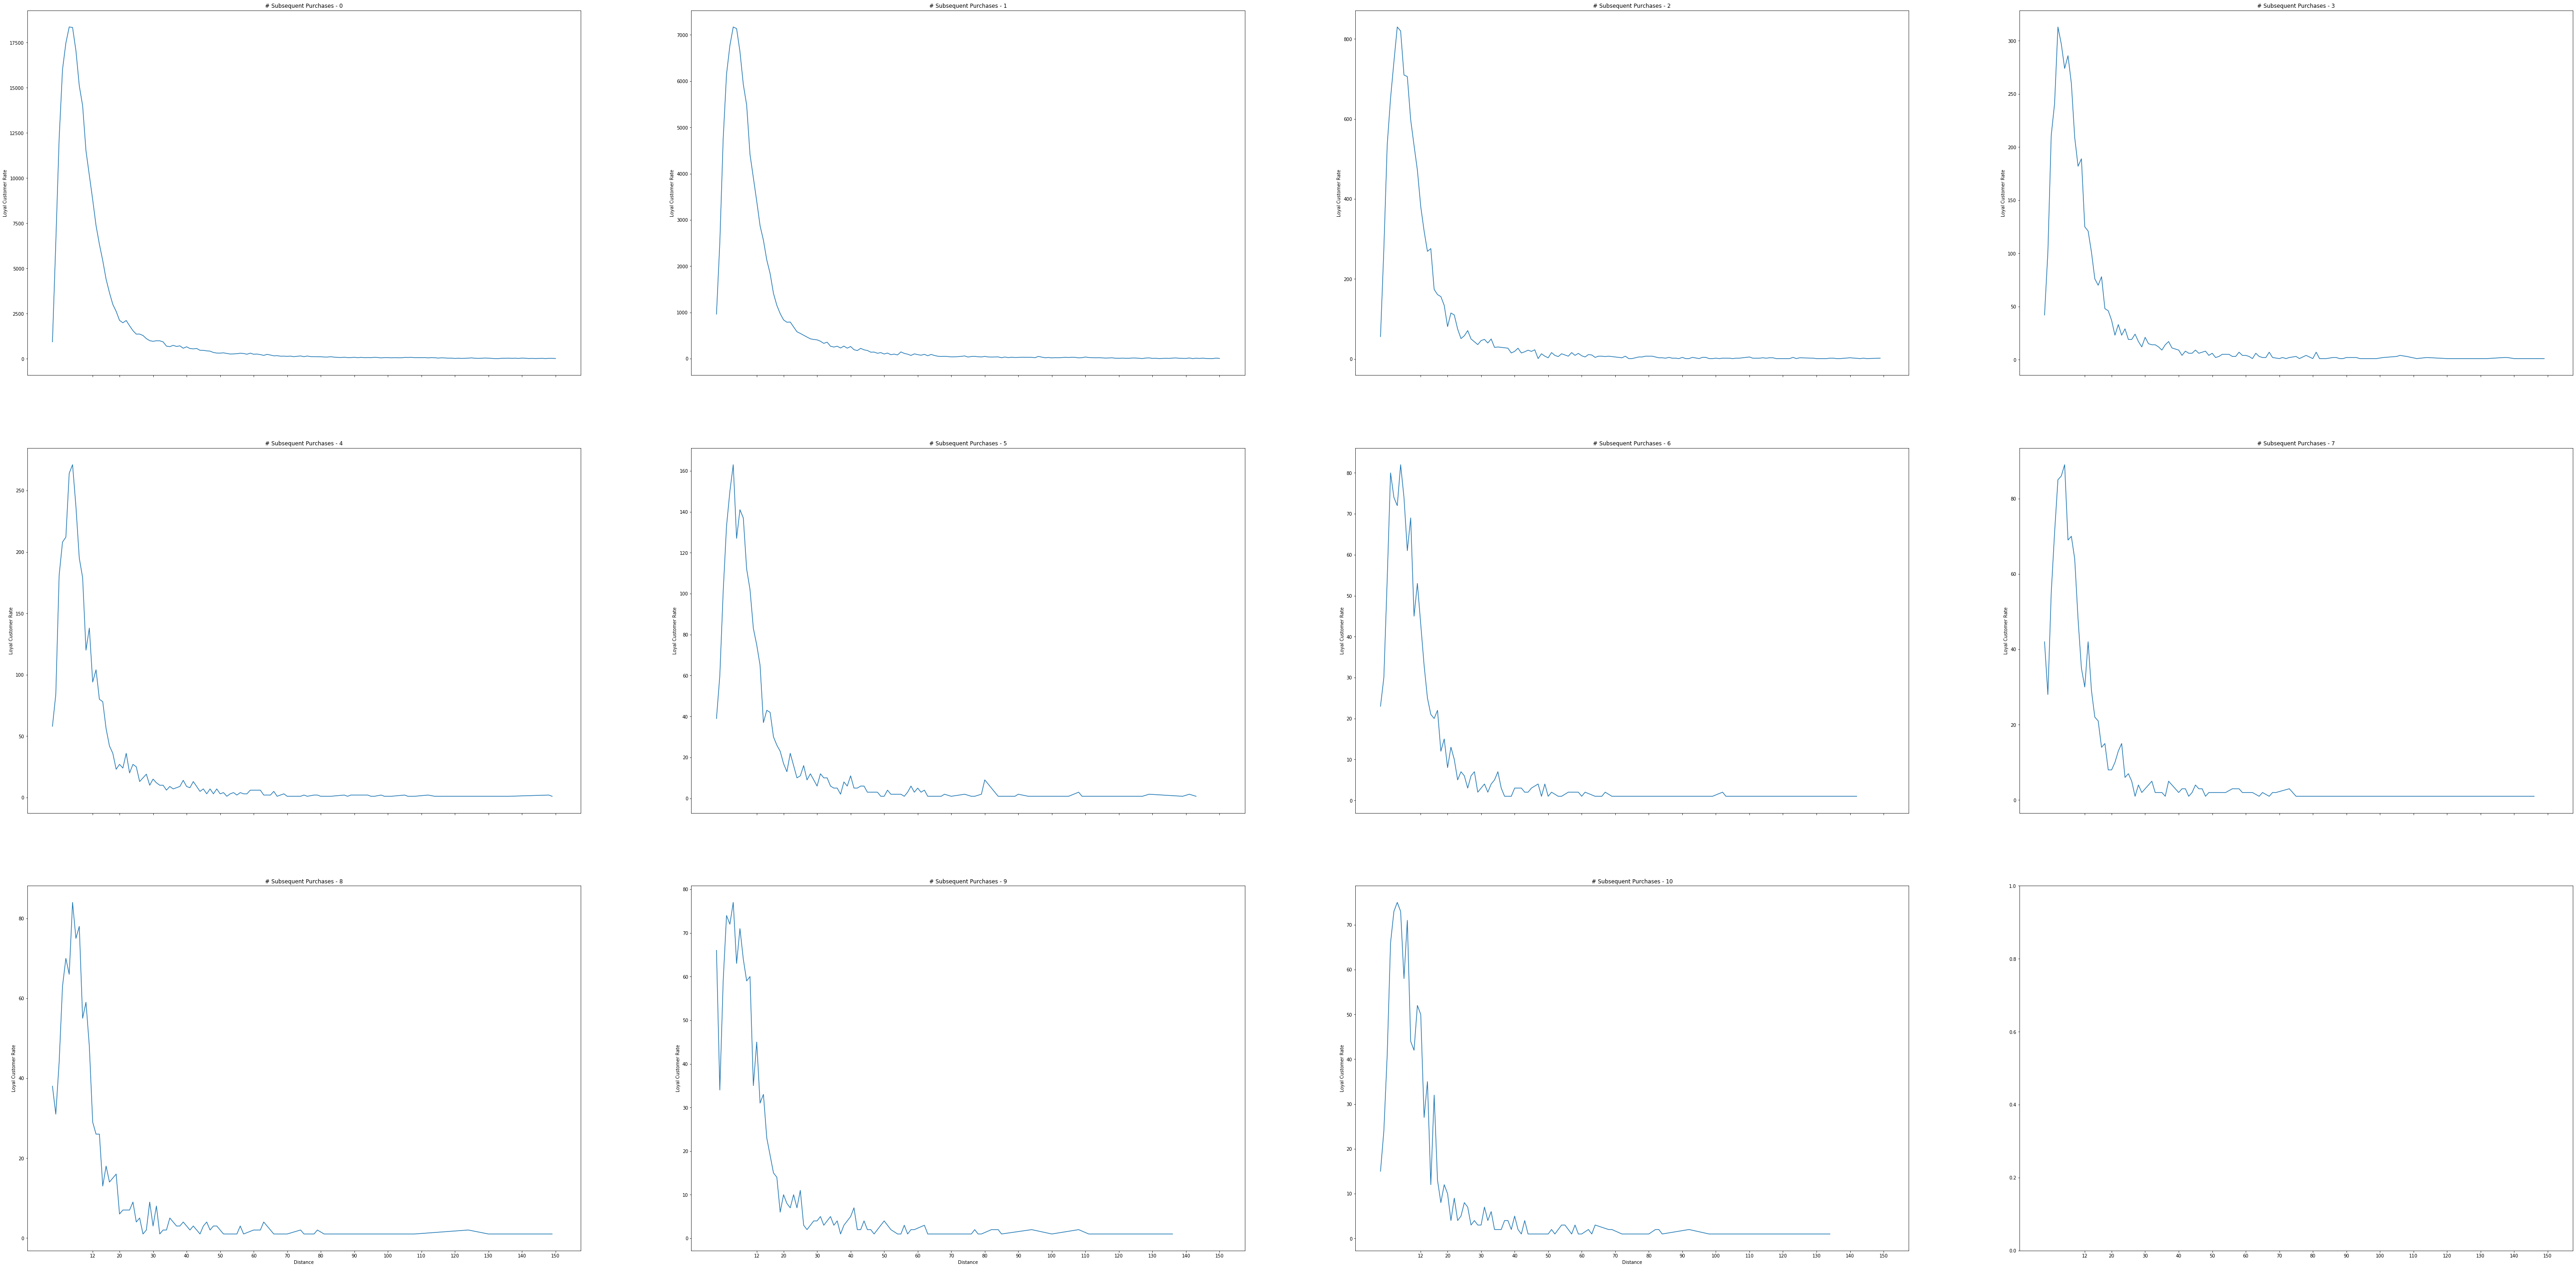

In [36]:
fig, axs = plt.subplots(3,4,figsize=(100,50),sharex=True,sharey=False)
axs = axs.flatten()
num=0

for subs in sorted(distance.subsequent_purchases.unique()):
    ax = sns.lineplot(x='customer_distance_to_dealer',y='counter',data=distance.loc[(distance.subsequent_purchases == subs) & (distance['customer_distance_to_dealer'] <= 150)].groupby('customer_distance_to_dealer')['counter'].sum().to_frame().reset_index(), ax=axs[num])
    ax.set_title('# Subsequent Purchases - {}'.format(subs))
    ax.set_xlabel('Distance')
    ax.set_ylabel('Loyal Customer Rate')
    ax.set_xticks([12,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
    num+=1
fig.show()
plt.savefig('distance_sub_purchases_plot.png')

In [30]:
len(distance.loc[distance['customer_distance_to_dealer'] >= 100])


3840

C:\Users\999Na\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



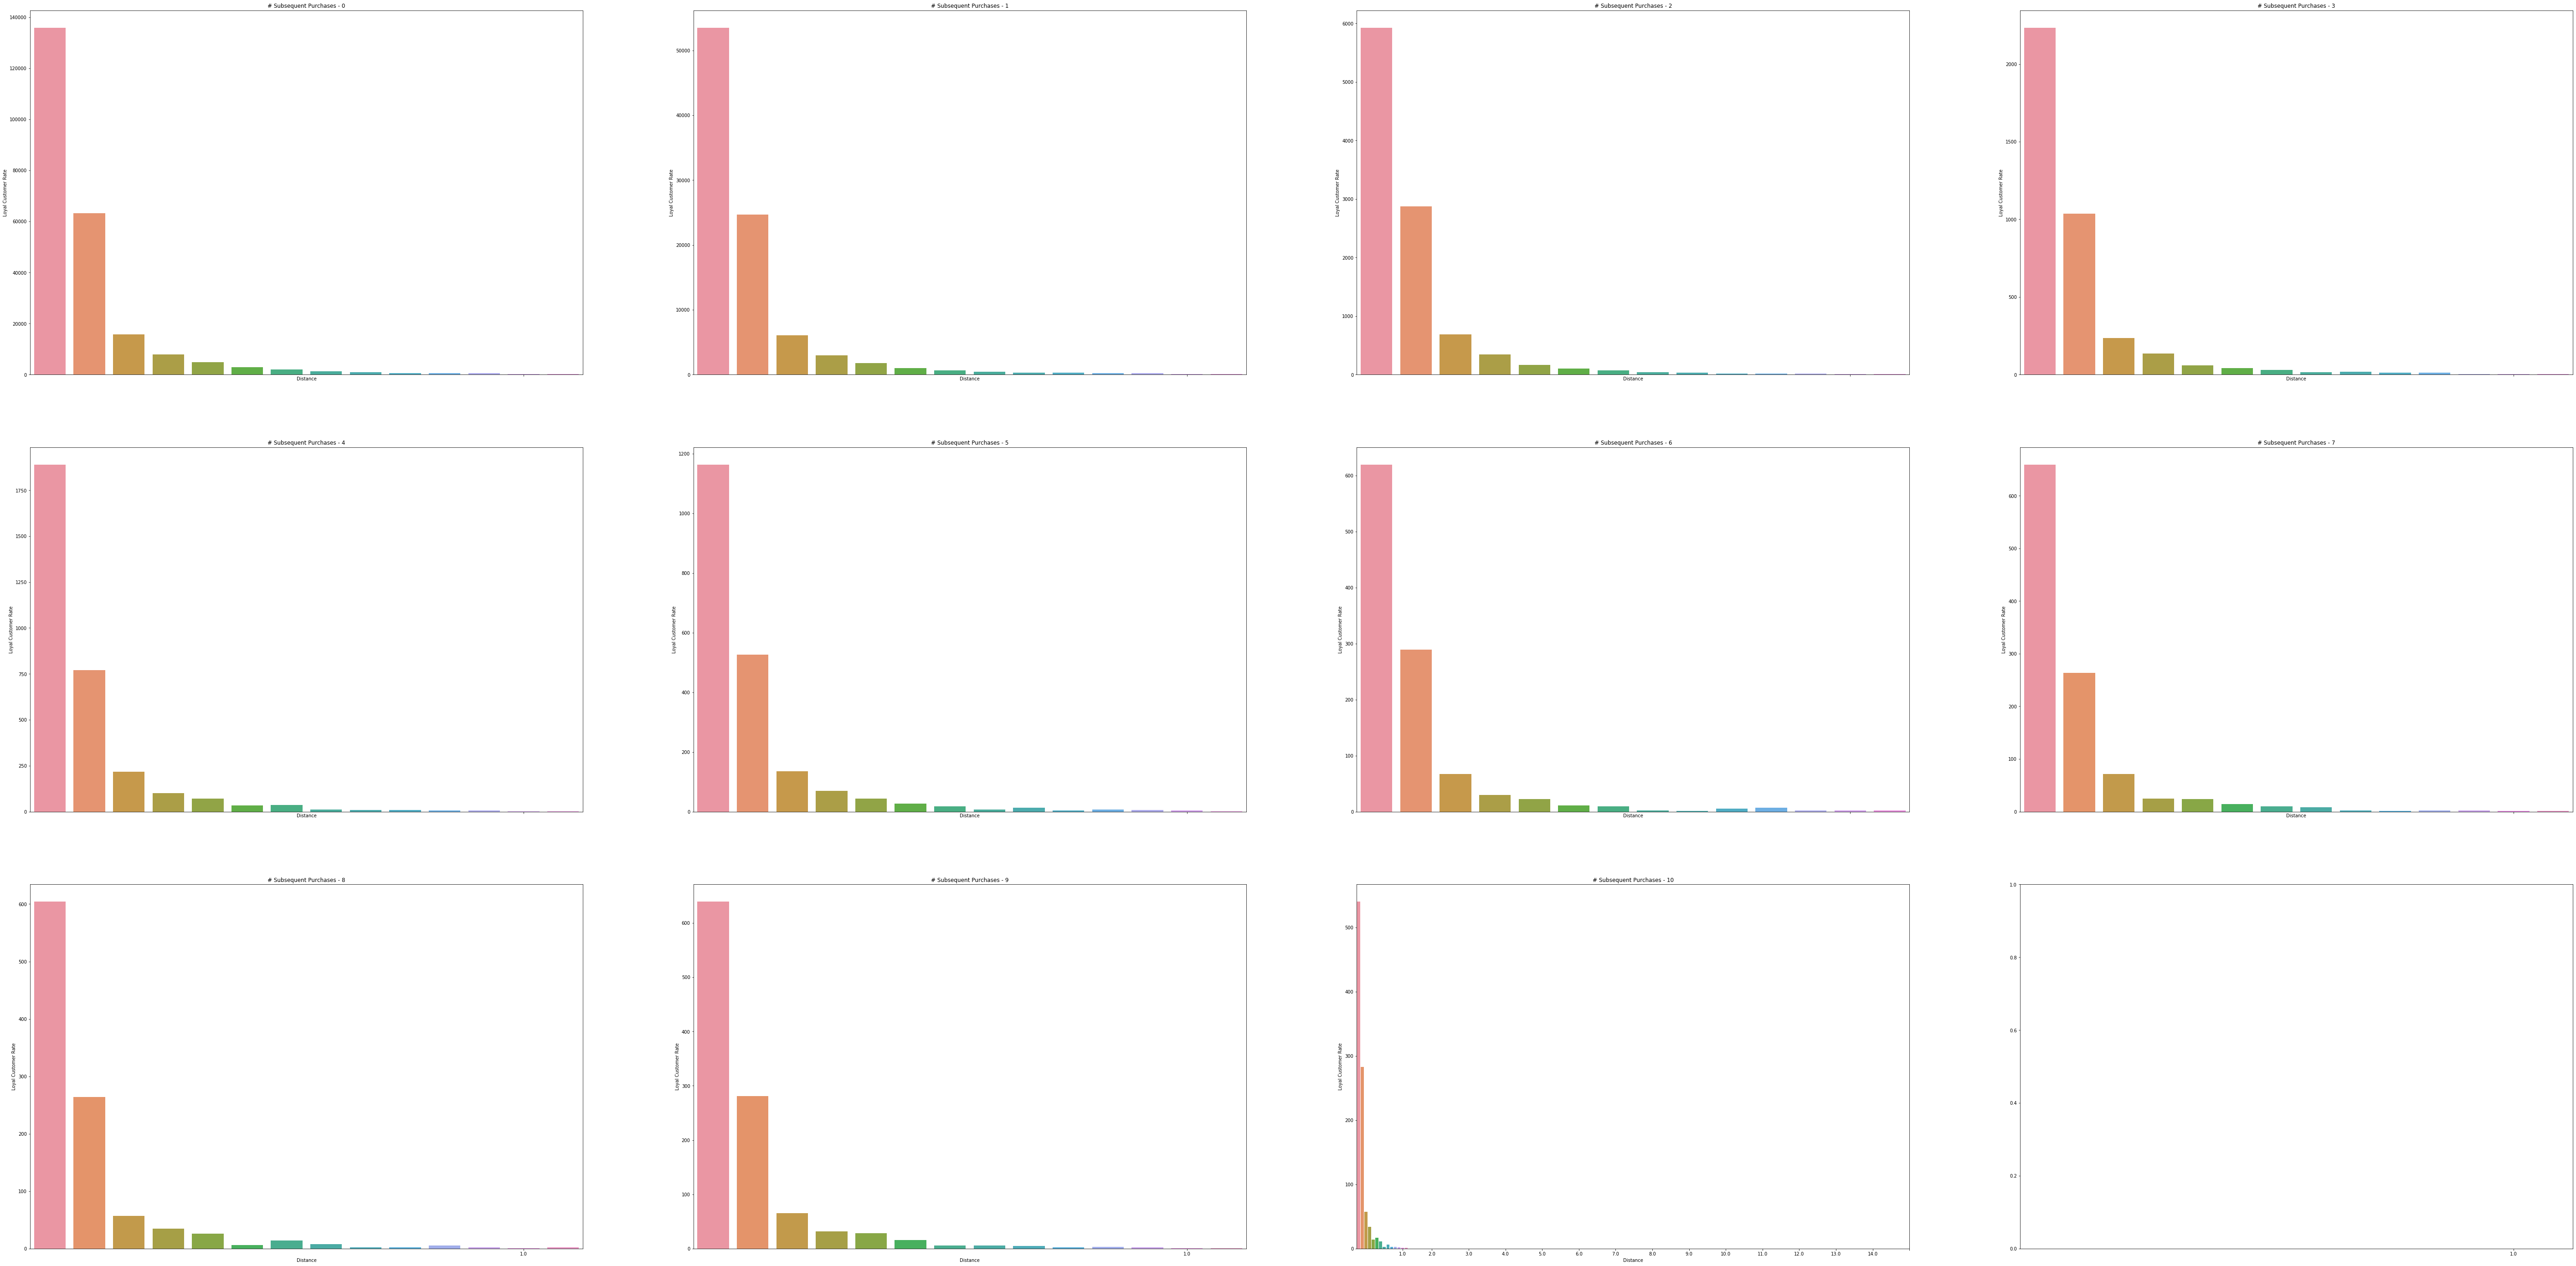

In [46]:
x = 10
y = 0
z = 1
norm_dist = distance.loc[distance['customer_distance_to_dealer'] <= 150]
while x <= 150:
    
    norm_dist.loc[(norm_dist['customer_distance_to_dealer'] >= y) & (norm_dist['customer_distance_to_dealer'] < x), 'dist_by_tens' ] = z
    
    x+=10
    y+=10
    z+=1
norm_dist    


fig, axs = plt.subplots(3,4,figsize=(100,50),sharex=True,sharey=False)
axs = axs.flatten()
num=0

for subs in sorted(norm_dist.subsequent_purchases.unique()):
    ax = sns.barplot(x='dist_by_tens',y='counter',data=norm_dist.loc[(norm_dist.subsequent_purchases == subs)].groupby('dist_by_tens')['counter'].sum().to_frame().reset_index(), ax=axs[num])
    ax.set_title('# Subsequent Purchases - {}'.format(subs))
    ax.set_xlabel('Distance')
    ax.set_ylabel('Loyal Customer Rate')
    ax.set_xticks([12,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
    num+=1
fig.show()
#plt.savefig('distance_sub_purchases_plot.png')

In [49]:
print(len(data.loc[data['customer_distance_to_dealer'] == '?']))
print(len(data.loc[(data['customer_distance_to_dealer'] == '?') &(data['vehicle_financing'] == 0)]))

6162
2166


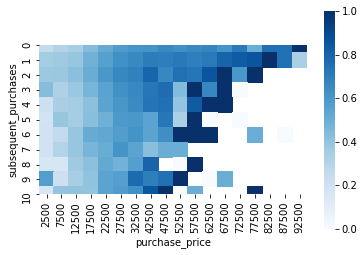

In [3]:
subs_price = sns.heatmap(data=pd.pivot_table(data=data.loc[data['purchase_price'] != '?'], index='subsequent_purchases', columns=['purchase_price'], values='trade_in', aggfunc='mean'),cmap='Blues',square=True)

In [57]:
model_pop = data.purchase_model.value_counts().to_frame().reset_index()
model_pop.rename(columns={'purchase_model':'model_popularity', 'index':'purchase_model'},inplace=True)
model_pop
subs_model_pop = data.merge(model_pop, on='purchase_model', how='left')
subs_model_pop.head()
#subs_model_pop = data.drop(columns=['model_popularity_x', 'model_popularity_y'])
#subs_model_pop
subs_model_pop = subs_model_pop.groupby(['purchase_make','purchase_model', 'model_popularity'])['actual'].mean().to_frame().reset_index()
#subs_model_pop.sort_values(by=['model_popularity'], inplace=True, ascending=True)
len(subs_model_pop['purchase_make'].unique())
#fig, axs = plt.subplots(nrows=6,ncols=8,figsize=(500,250))
#axs = axs.flatten()
#num=0
for make in subs_model_pop.purchase_make.unique():
    sub_make = subs_model_pop.loc[subs_model_pop['purchase_make'] == make]
    sub_make.sort_values(by=['model_popularity'], inplace=True, ascending=True)
    sub_make.to_csv('make_graphs/'+make+'.csv')
    #ax = sns.lineplot(x='purchase_model',y='actual',data=sub_make, ax=axs[num])
    #ax.set_title('Make - {}'.format(make))
    #ax.set_xlabel('Model')
    #ax.set_ylabel('Loyalty Rate')
    #num+=1

#fig.show()
#plt.savefig('model_subs.png')

C:\Users\999Na\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



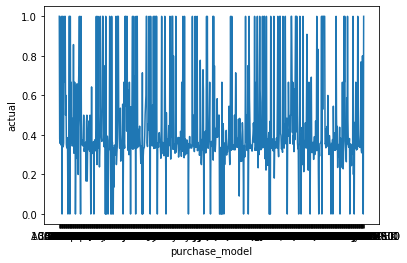

In [7]:
model_pop = data.purchase_model.value_counts().to_frame().reset_index()
model_pop.rename(columns={'purchase_model':'model_popularity', 'index':'purchase_model'},inplace=True)
model_pop
subs_model_pop = data.merge(model_pop, on='purchase_model', how='left')
subs_model_pop = subs_model_pop.groupby(['model_popularity', 'purchase_model'])['actual'].mean().to_frame().reset_index()
subs_model_pop.sort_values(by=['model_popularity'], ascending=True, inplace=True)

sns.lineplot(x='purchase_model', y='actual', data=subs_model_pop)
subs_model_pop.to_csv('model_pop_loyalty.csv')

In [10]:
model_pop = data.purchase_model.value_counts().to_frame().reset_index()
model_pop.rename(columns={'purchase_model':'model_popularity', 'index':'purchase_model'},inplace=True)
model_pop.model_popularity = model_pop.model_popularity/model_pop.model_popularity.sum()
model_pop
subs_model_pop = data.merge(model_pop, on='purchase_model', how='left')
subs_model_pop = subs_model_pop.groupby(['model_popularity', 'purchase_model'])['actual'].mean().to_frame().reset_index()
subs_model_pop.sort_values(by=['model_popularity'], ascending=True, inplace=True)

subs_model_pop.to_csv('model_pop_loyalty.csv')

In [ ]:
distance_bins = [-1,.1, 1.1, 5.1, 10.1, 25.1, 50.1, 100.1, 2500.1]
distance_labels = [1,2,3,4,5,6,7,8]
data['distance_binned'] = pd.cut(data['customer_distance_to_dealer'], bins=distance_bins, labels=distance_labels)

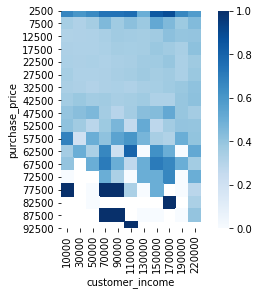

In [18]:
sns.heatmap(data=pd.pivot_table(data=income.loc[(income['purchase_price'] != '?')], index='purchase_price', columns=['customer_income'], values='actual', aggfunc='mean'),cmap='Blues',square=True)

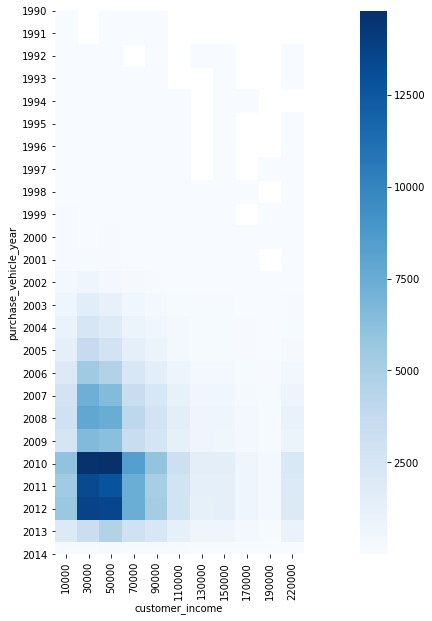

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(data=pd.pivot_table(data=income.loc[income['purchase_vehicle_year'] >= 1990], index='purchase_vehicle_year', columns=['customer_income'], values='counter', aggfunc='count'),cmap='Blues',square=True)

In [30]:
income_percent = income.customer_income.value_counts().to_frame().reset_index()
income_percent.rename({'customer_income':'percent_pop', 'index':'customer_income'}, inplace=True)
income_pop = income.merge(income_percent, on='customer_income', how='left')
income_pop
#income_pop = income_pop.groupby(['purchase_price', 'customer_income', 'percent_pop'])['counter'].count()
#income_pop
#income_percent.percent_pop = income_percent.percent_pop/income_percent.percent_pop

,insert_num,purchase_make,purchase_model,purchase_vehicle_year,purchase_price,trade_in,vehicle_financing,customer_age,customer_income,customer_gender,customer_previous_purchase,customer_distance_to_dealer,post_purchase_satisfaction,vehicle_warranty_used,subsequent_purchases,actual,counter,index
0,81690,DODGE,CHARGER,2010,12500,0,0,25,30000,U,0,9,?,1,0,0,1,NaN
1,109994,FORD,EXPLORER SPORT TRAC,2007,17500,0,1,65,30000,M,1,15,?,0,0,0,1,NaN
2,11399,BMW,328,2010,22500,1,1,35,90000,F,1,18,?,0,9,1,1,NaN
3,36685,CHEVROLET,CRUZE,2012,12500,1,1,25,50000,M,0,2,?,0,0,0,1,NaN
4,256143,MITSUBISHI,OUTLANDER SPORT,2011,17500,0,1,25,50000,M,0,12,?,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312463,195314,JEEP,GRAND CHEROKEE,2005,17500,0,1,35,70000,M,0,5,?,0,0,0,1,NaN
312464,58219,CHEVROLET,SILVERADO 1500,2013,27500,0,1,25,110000,F,0,8,?,0,0,0,1,NaN
312465,207386,KIA,OPTIMA,2012,17500,1,1,45,50000,F,0,4,?,0,0,0,1,NaN
312466,252391,MINI,COOPER,2010,17500,1,1,45,50000,M,0,5,?,1,0,0,1,NaN


In [35]:
print(data.loc[(data['purchase_vehicle_year'] <= 2002) & (data['purchase_vehicle_year'] >= 1990)]['actual'].mean())
print(data.loc[data['purchase_vehicle_year'] <= 1990]['actual'].mean())
print(data.loc[data['purchase_vehicle_year'] > 2002]['actual'].mean())      


0.5626785714285715
0.7027027027027027
0.33812395667642775
